# Import Libraries

In [1]:
# linear algebra
import numpy as np  

# data processing
import pandas as pd  

# data visualising
import matplotlib.pyplot as plt 
import seaborn as sns

# feature selection
from sklearn.linear_model import Lasso, lars_path

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model building
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV # Logistic Regression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # Random Forest

# model evaluation
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Import Data

In [2]:
# menampilkan isi data
df = pd.read_csv('Airline_Dataset.csv')

# Data Cleaning and Preparation
#### The columns in the dataframe are cleaned and reorganized:
- Column names are renamed.
- Elements in Features 'Customer Type' and 'Class' are renamed.
- Rows with Null values are removed.
- Rows with scores of 0 in the survey of satisfaction are removed (Customers probably did not indicate).
- Departure Delay and Arrival Delay are combined.
- Satisfaction target is relabelled as 0 and 1.

In [3]:
# menampilkan dataset
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
# menampilkan beberapa baris awal data
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# menampilkan kolom/variabel data
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Satisfaction'],
      dtype='object')

In [6]:
# menampilkan deskripsi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [7]:
# mengecek apakah data memiliki nilai null
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Satisfaction                           0
dtype: int64

In [8]:
# menghilangkan data NA
df = df.dropna(axis=0)

In [9]:
# menduplikasi dataframe untuk testing
DF = df.copy()

In [10]:
# menghapus kolom Id
df = df.drop('id',axis=1)

In [11]:
# mengubah tipe data 
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

In [12]:
# mengubah nama kolom
df = df.rename(columns={'Leg room service':'Leg room'})

from string import capwords
df.columns = [capwords(i) for i in df.columns]
df = df.rename(columns={'Departure/arrival Time Convenient':'Departure/Arrival Time Convenience'})

In [13]:
# mengubah nama elemen dalam variabel customer type
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':'Returning Customer','disloyal Customer':'First-time Customer'})

In [14]:
# mengubah nama elemen dalam variabel class
df['Class'] = df['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

In [15]:
# menghapus baris dengan skor 0 dalam survei kepuasan dihapus
df = df[(df['Inflight Wifi Service']!=0)&(df['Departure/Arrival Time Convenience']!=0)&(df['Ease Of Online Booking']!=0)&(df['Gate Location'])&(df['Food And Drink']!=0)&(df['Online Boarding']!=0)&(df['Seat Comfort']!=0)&(df['Inflight Entertainment']!=0)&(df['On-board Service']!=0)&(df['Leg Room']!=0)&(df['Baggage Handling']!=0)&(df['Checkin Service']!=0)&(df['Inflight Service']!=0)&(df['Cleanliness']!=0)]

In [16]:
# mengganti label variabel target sebagai 0 dan 1.
df['Satisfaction'] = df['Satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df = df.reset_index()
df = df.drop('index',axis=1)

In [17]:
# menggabungkan kolom Departure Delay dan Arrival Delay menjadi Total Delay
df['Total Delay'] = df['Departure Delay In Minutes'] + df['Arrival Delay In Minutes']

# menghapus kolom Departure Delay dan Arrival Delay karena telah digabungkan
df = df.reindex(columns=['Satisfaction']+list(df.columns)[:-2]+['Total Delay'])
df = df.drop(['Departure Delay In Minutes','Arrival Delay In Minutes'],axis=1)

In [18]:
# menampilkan informasi data setelah dibersihkan/siapkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69066 entries, 0 to 69065
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Satisfaction                        69066 non-null  int64  
 1   Gender                              69066 non-null  object 
 2   Customer Type                       69066 non-null  object 
 3   Age                                 69066 non-null  int64  
 4   Type Of Travel                      69066 non-null  object 
 5   Class                               69066 non-null  object 
 6   Flight Distance                     69066 non-null  int64  
 7   Inflight Wifi Service               69066 non-null  int64  
 8   Departure/Arrival Time Convenience  69066 non-null  int64  
 9   Ease Of Online Booking              69066 non-null  int64  
 10  Gate Location                       69066 non-null  int64  
 11  Food And Drink                      69066

In [19]:
# menampilkan deskripsi statistik dari data
df.describe()

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay
count,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000
mean,0.435743,40.000376,1234.754858,2.822677,3.227029,2.890815,2.896099,3.212912,3.349955,3.466756,3.387195,3.407639,3.393696,3.648684,3.318666,3.658877,3.303333,30.119581
std,0.495857,14.967688,1003.694541,1.339493,1.504212,1.415409,1.449267,1.323239,1.262698,1.311368,1.326482,1.280425,1.293872,1.171475,1.263832,1.168167,1.307958,75.654959
min,0.000000,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,28.000000,444.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,0.000000,40.000000,883.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,1.000000,51.000000,1814.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,24.000000
max,1.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3176.000000


In [20]:
# menampilkan proporsi target variabel
df['Satisfaction'].value_counts(normalize=True)

0    0.564257
1    0.435743
Name: Satisfaction, dtype: float64

# Exploratory Data Analysis and Feature Selection

#### Create visualizations to first understand business problem, and also identify important features for model building:
- Find out proportion of classes in target, and split them by Type of Travel and Type of Customers (To understand trend of satisfaction - useful later in model evaluation)
- Identify feature significance for model through visualizing KDE plots, LASSO path and heatmap.
- After evaluation and discreet selection, I have decided to drop 'Gender, 'Total Delay','Flight Distance','Age','Gate Location' and 'Departure/Arrival Time Convenience'

## Visualization of Categorical Variables

Satisfaction

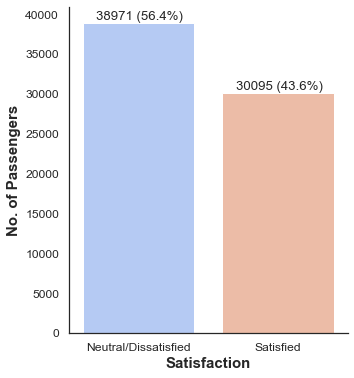

In [21]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()

Satisfaction by Type of Travel

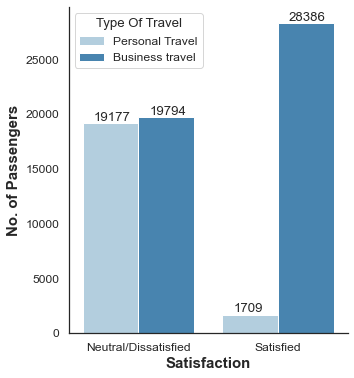

In [22]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Type Of Travel',palette='Blues')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()

Satisfaction by Customer Type

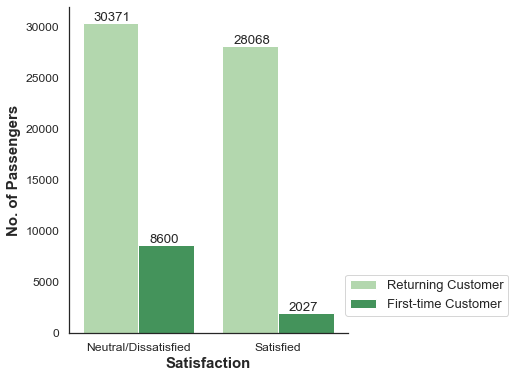

In [23]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Customer Type',palette='Greens')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()

Satisfaction by Gender

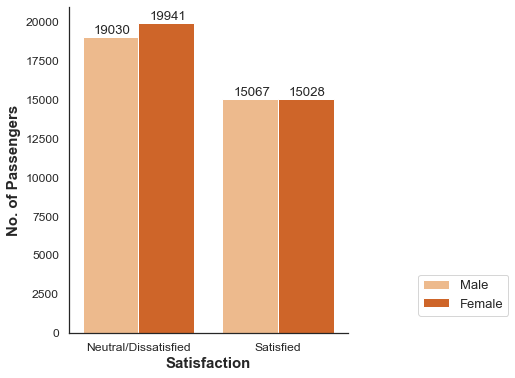

In [24]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Gender',palette='Oranges')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()

Satisfaction by Travel Class

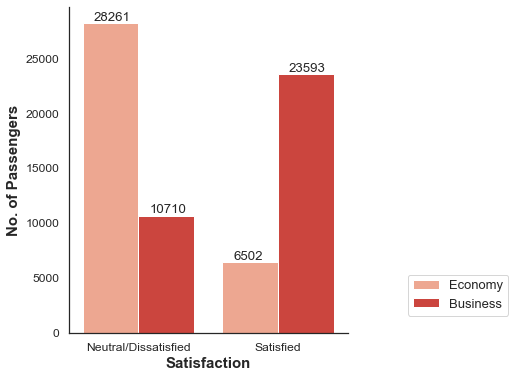

In [25]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Class',palette='Reds')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()

## Visualization of Numerical Variables

Satisfaction by Age

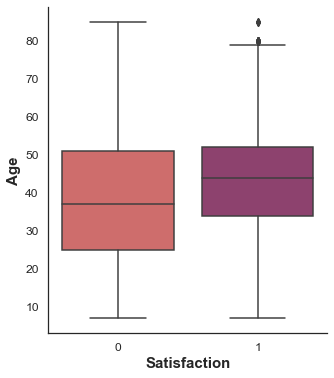

In [26]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
sns.boxplot(data=df, x='Satisfaction', y='Age', palette="flare")
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('Age',weight='bold',fontsize='15')
sns.despine()

Satisfaction by Distance

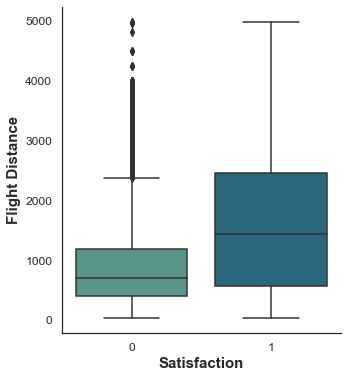

In [27]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
sns.boxplot(data=df, x='Satisfaction', y='Flight Distance', palette="crest")
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('Flight Distance',weight='bold',fontsize='15')
sns.despine()

In [28]:
df1 = pd.get_dummies(df, columns=['Gender','Customer Type','Type Of Travel','Class'], drop_first=True)
df1

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Gender_Male,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43.0,1,1,1,1
1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7.0,1,0,0,0
2,0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20.0,0,1,0,0
3,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1,0,0
4,0,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69061,0,36,432,1,5,1,3,4,1,4,4,5,2,5,2,3,4,0.0,0,0,0,1
69062,0,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0.0,1,0,0,0
69063,0,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0.0,0,1,1,1
69064,1,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0.0,1,1,0,0


## Feature Selection

### KDE plots

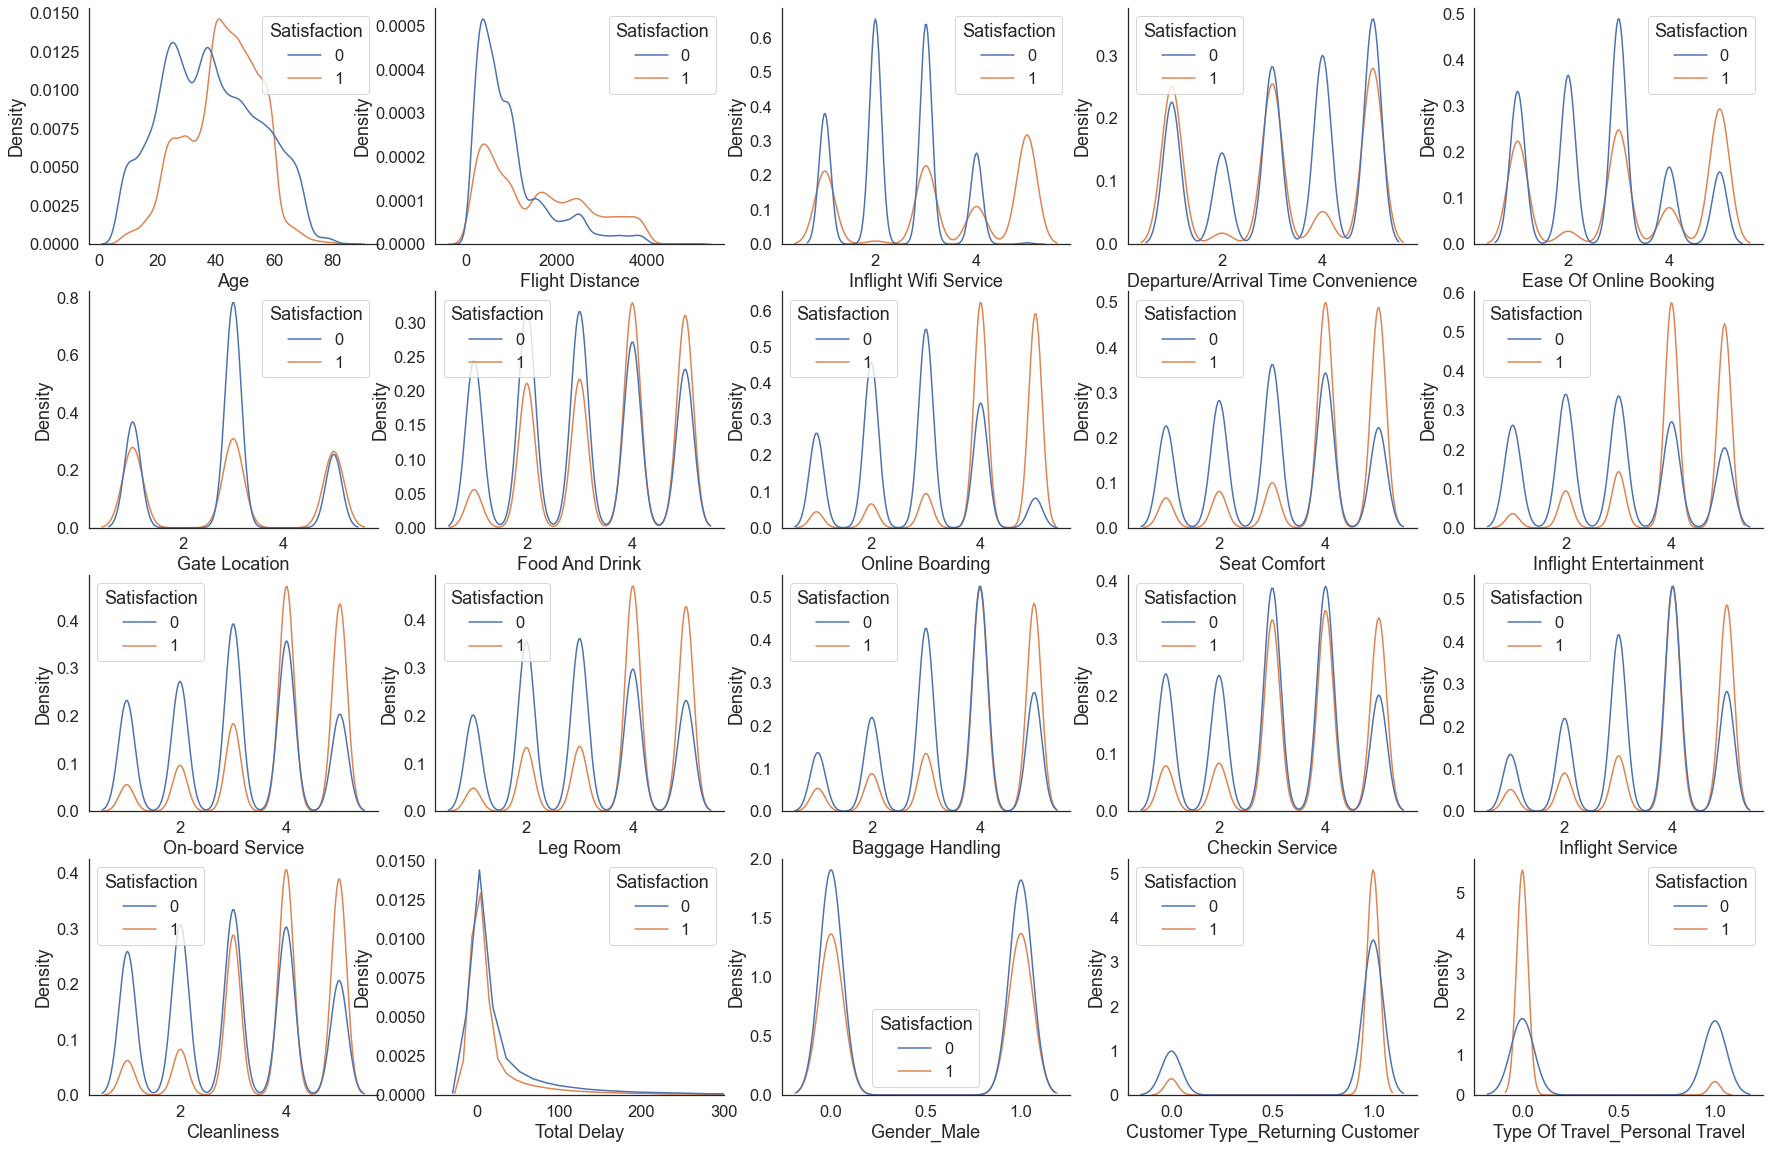

In [29]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()

In [30]:
# Distribusi kepuasan dalam fitur 'Gender' hampir sama untuk keduanya sehingga akan dihilangkan
df1 = df1.drop('Gender_Male', axis=1)

### Correlation Matrix and Heatmap

In [31]:
# correlation matrix
corr_matrix = df1.corr()
corr_matrix

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
Satisfaction,1.000000,0.150330,0.303677,0.348541,-0.070339,0.204093,0.043578,0.229684,0.566547,0.372681,0.444786,0.345886,0.344405,0.270842,0.237069,0.268040,0.331106,-0.055746,0.210703,-0.469940,-0.504920
Age,0.150330,1.000000,0.083523,0.015717,-0.018813,0.017418,0.016286,0.022591,0.190272,0.159516,0.081202,0.064508,0.053213,-0.040651,0.037817,-0.046491,0.055343,-0.016000,0.248931,-0.065730,-0.137597
Flight Distance,0.303677,0.083523,1.000000,0.005510,-0.076475,0.050290,0.031325,0.057600,0.195383,0.154670,0.132126,0.115268,0.134143,0.069399,0.074036,0.061872,0.095962,-0.000989,0.199221,-0.280260,-0.468605
Inflight Wifi Service,0.348541,0.015717,0.005510,1.000000,0.441308,0.672462,0.443898,0.141383,0.420391,0.135243,0.216028,0.119044,0.151017,0.111939,0.051640,0.102409,0.144782,-0.025515,0.012180,-0.119000,-0.039514
Departure/Arrival Time Convenience,-0.070339,-0.018813,-0.076475,0.441308,1.000000,0.576451,0.596772,-0.010922,0.043472,-0.020132,-0.036836,0.061496,-0.005752,0.068147,0.099593,0.069379,-0.004830,-0.005037,0.090479,0.257842,0.129964
Ease Of Online Booking,0.204093,0.017418,0.050290,0.672462,0.576451,1.000000,0.599579,0.024465,0.311904,0.024961,0.031309,0.024647,0.079828,0.018964,0.010062,0.017221,0.012290,-0.010531,0.028937,-0.122754,-0.104740
Gate Location,0.043578,0.016286,0.031325,0.443898,0.596772,0.599579,1.000000,0.003245,0.025883,0.016101,0.014691,-0.008573,0.009167,-0.001322,-0.023836,-0.004327,0.000937,0.001105,0.034772,-0.072084,-0.048318
Food And Drink,0.229684,0.022591,0.057600,0.141383,-0.010922,0.024465,0.003245,1.000000,0.263983,0.565449,0.607716,0.065210,0.035821,0.038652,0.096476,0.038172,0.643129,-0.024135,0.057759,-0.069419,-0.089825
Online Boarding,0.566547,0.190272,0.195383,0.420391,0.043472,0.311904,0.025883,0.263983,1.000000,0.454027,0.318849,0.171895,0.141128,0.100118,0.225618,0.090729,0.366401,-0.033037,0.184988,-0.220551,-0.321064
Seat Comfort,0.372681,0.159516,0.154670,0.135243,-0.020132,0.024961,0.016101,0.565449,0.454027,1.000000,0.607696,0.144117,0.114395,0.082143,0.202177,0.079402,0.674680,-0.029623,0.151569,-0.134707,-0.237519


Text(0.5, 1.0, 'Correlation Heatmap')

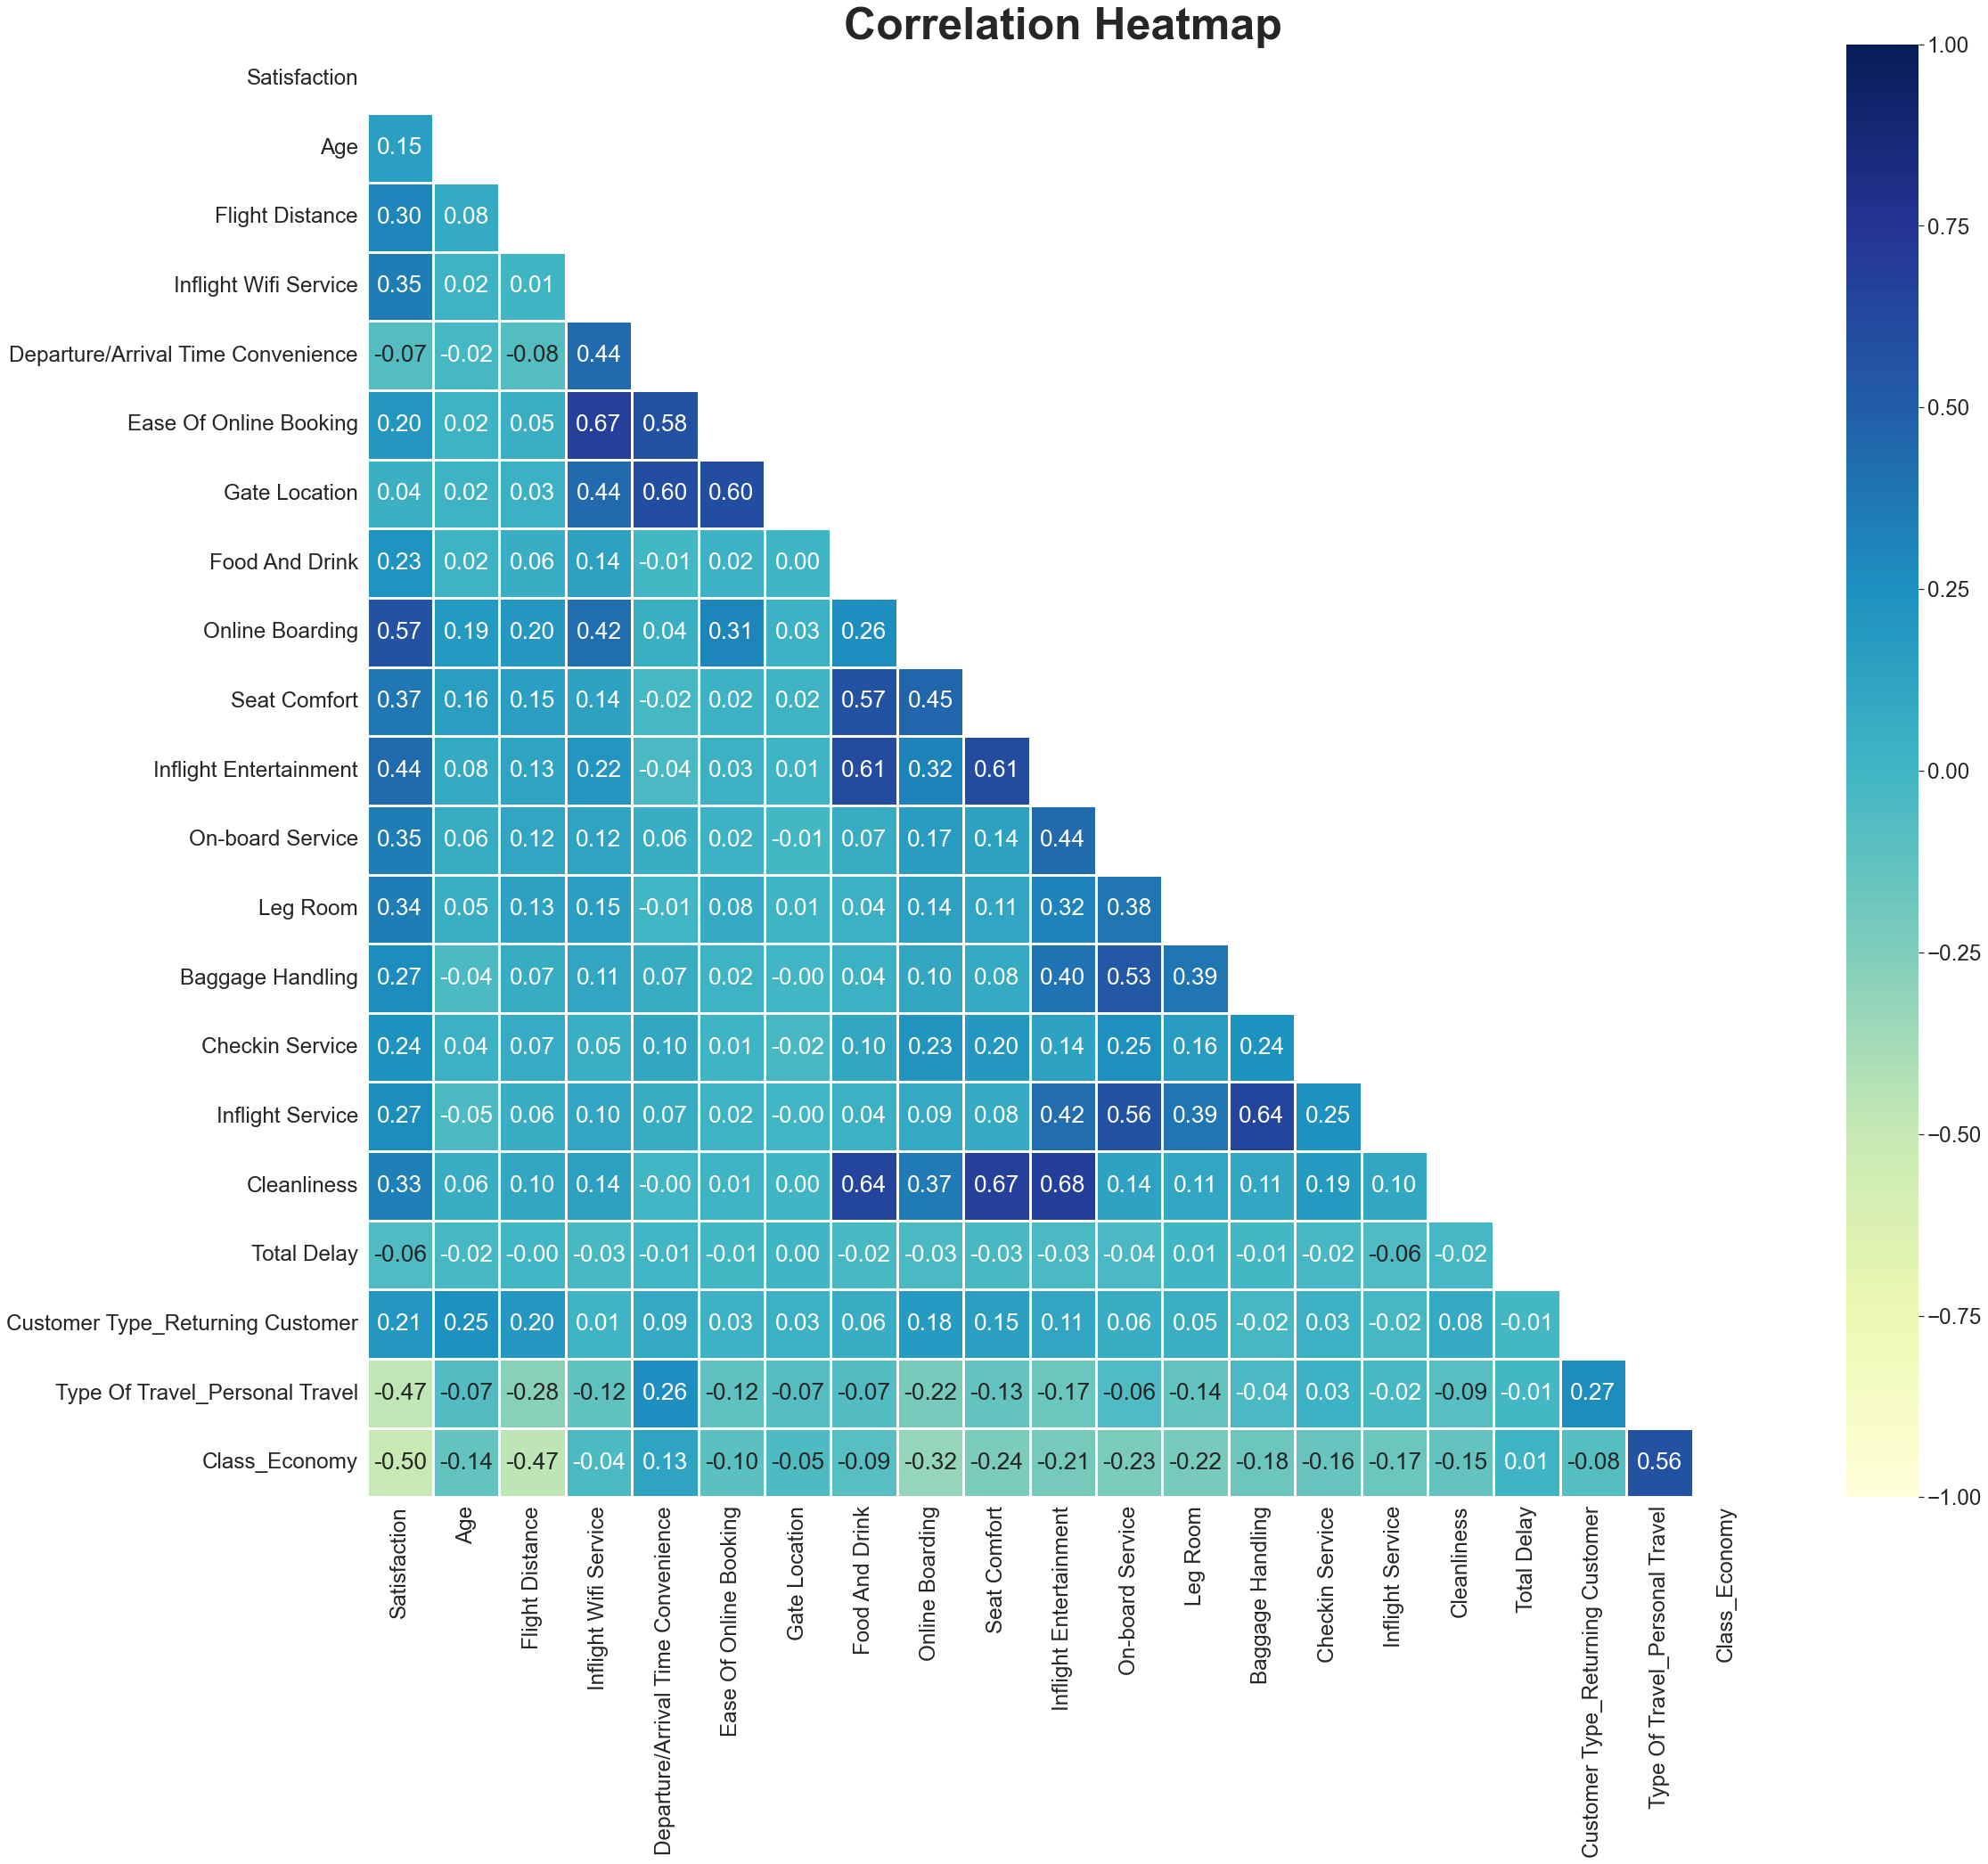

In [32]:
# correlation heatmap
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='YlGnBu',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)

Fitur 'Age,' 'Departure / Arrival Time Convenience,' 'Gate Location,' dan 'Total Delay' memiliki korelasi yang buruk dengan variabel target (Satisfaction) yakni 0,15 ke bawah

### LASSO path

In [33]:
# menentukan variabel dependen y dan independen X
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)

In [34]:
# menormalkan fitur(setiap kolom X) sehingga setiap kolom/fitur/variabel akan memiliki mean = 0 dan standard deviation = 1
std = StandardScaler()
std.fit(X.values)
X_tr = std.transform(X.values)

In [35]:
# membuat lasso model
lasso_model = Lasso(alpha = 0.01)    
selected_columns = list(X.columns)
lasso_model.fit(X, y)
list(zip(selected_columns, lasso_model.coef_))

[('Age', 0.00013145369281497164),
 ('Flight Distance', 2.6269934798460135e-05),
 ('Inflight Wifi Service', 0.05833828264907208),
 ('Departure/Arrival Time Convenience', -0.025703769332411256),
 ('Ease Of Online Booking', -0.0),
 ('Gate Location', -0.0008139404744525279),
 ('Food And Drink', -0.0),
 ('Online Boarding', 0.10613247167886887),
 ('Seat Comfort', 0.0006954566176312981),
 ('Inflight Entertainment', 0.03632281604858479),
 ('On-board Service', 0.033328825175459396),
 ('Leg Room', 0.0364518947737136),
 ('Baggage Handling', 0.012697120797113723),
 ('Checkin Service', 0.028862631954215345),
 ('Inflight Service', 0.010451226725440722),
 ('Cleanliness', 0.0118562187217933),
 ('Total Delay', -0.00021462740634962295),
 ('Customer Type_Returning Customer', 0.18930324919633668),
 ('Type Of Travel_Personal Travel', -0.28411668082788655),
 ('Class_Economy', -0.08783294972847767)]

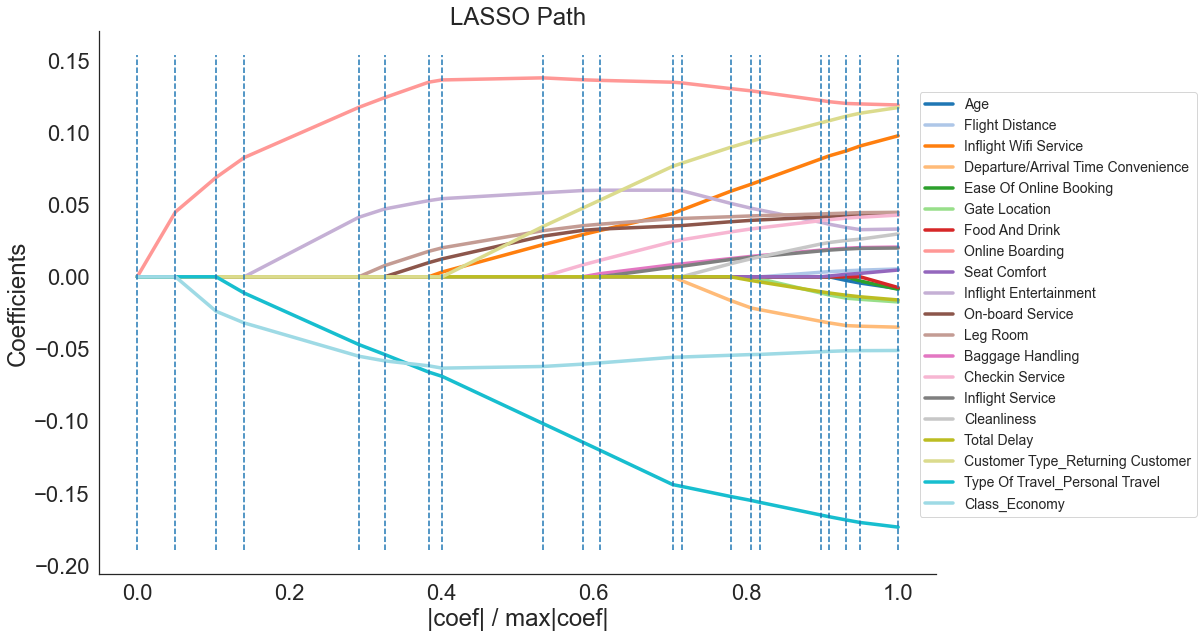

In [36]:
alphas, _, coefs = lars_path(X_tr, y.values, method='lasso')

from cycler import cycler

# plotting the LARS path
sns.set(style='white',font_scale=2)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.rc('axes', prop_cycle =(cycler(color =['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A',
                                            '#D62728', '#FF9896', '#9467BD', '#C5B0D5', '#8C564B', '#C49C94',
                                            '#E377C2', '#F7B6D2', '#7F7F7F', '#C7C7C7', '#BCBD22', '#DBDB8D',
                                            '#17BECF', '#9EDAE5'])))

plt.figure(figsize=(15,10))
plt.plot(xx, coefs.T,linewidth=3.5)

ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X.columns,loc="upper right", bbox_to_anchor=(1.32, 0.9),fontsize=14)
sns.despine()

Hasil LASSO path menunjukkan bahwa variabel 'Food and Drink', 'Ease of Online Booking', 'Age', 'Flight Distance',
'Total Delay', dan 'Gate Location' tidak signifikan karena memiliki koefisien linier yang paling cepat turun ke nol

In [37]:
# Dari rangkaian feature selection yang dilakukan, beberapa variabel akan dibuang untuk membuat model yang lebih optimal, yakni:
df1 = df1.drop(['Total Delay','Flight Distance','Age','Gate Location','Departure/Arrival Time Convenience'], axis=1)

# Serta, variabel Gender yang telah dibuang pada sebagai hasil dari tahap KDE plots

# Model Selection
#### Find out the best model for the data through Regularization, Cross Validation with evaluation with f1 score:
- Logistic Regression (find out the best C)
- KNN (find out the best k)
- Gaussian Naive Bayes
- Decision Trees (find out the best depth)
- Random Forest (find out the best depth; no. of trees did not improve the model significantly)
- Ensemble (Taking all the models with the best hyperparameters)

#### Random Forest is selected as the best model, but Simple Validation is conducted to tune probability threshold:
- When threshold increased from 0.5 to 0.7, a better precision is obtained from 97% to 99%
- We need the best precision for our business solution

In [38]:
# menentukan variabel dependen y dan independen X
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)

In [39]:
# membagi data training 80% dan testing 20%
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [40]:
# inisialisasi variabel kf untuk cross validation
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

# banyaknya fold = 5

## Logistic Regression Model 

In [41]:
# membuat model Logistic Regression
Cvec = np.linspace(0.001,2,100)
lr_model = LogisticRegressionCV(Cs=Cvec, cv=kf, max_iter=10000)
lr_model.fit(X_train_val, y_train_val)
lr_model.C_
lr_model = LogisticRegression(C=lr_model.C_[0],max_iter=10000)

In [42]:
# menghitung cross validation dari nilai AUC, precision, dan recall dari model logistic regression
Mean_AUC_Logit_CV = np.mean(cross_val_score(lr_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_Precision_Logit_CV = np.mean(cross_val_score(lr_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Recall_Logit_CV = np.mean(cross_val_score(lr_model, X_train_val, y_train_val, cv=kf, scoring='recall'))

print("AUC Score of Logistic Regression Model is : ", "{:.2f}%".format(100* Mean_AUC_Logit_CV))
print("Precision of Logistic Regression Model is : ", "{:.2f}%".format(100* Mean_Precision_Logit_CV))
print("Recall of Logistic Regression Model is : ", "{:.2f}%".format(100* Mean_Recall_Logit_CV))

AUC Score of Logistic Regression Model is :  95.75%
Precision of Logistic Regression Model is :  88.26%
Recall of Logistic Regression Model is :  86.89%


In [43]:
# reset index X dan y
X_train_val = X_train_val.reset_index().drop('index',axis=1)
y_train_val = y_train_val.reset_index().drop('index',axis=1)

## K-Nearest Neighbors 

In [44]:
# menghitung nilai k optimal bagi model KNN
score = []
for neighbors in range(5,11):
    f1 = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=neighbors), X_train_val, y_train_val, cv=kf, scoring='f1'))
    score.append(f1)
    print(neighbors)
best_neighbors = list(range(5,11))[np.argmax(score)]  
best_f1 = max(score)
print('The best k neighbours is {0} with f1-score of {1}'.format(best_neighbors,best_f1))

5
6
7
8
9
10
The best k neighbours is 9 with f1-score of 0.9272716364359761


In [45]:
# membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_val, y_train_val)

KNeighborsClassifier(n_neighbors=9)

In [46]:
# menghitung cross validation dari nilai AUC, precision, dan recall dari model knn
Mean_AUC_KNN_CV = np.mean(cross_val_score(knn_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_Precision_KNN_CV = np.mean(cross_val_score(knn_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Recall_KNN_CV = np.mean(cross_val_score(knn_model, X_train_val, y_train_val, cv=kf, scoring='recall'))

print("AUC Score of K-Nearest Neighbors Model is : ", "{:.2f}%".format(100* Mean_AUC_KNN_CV))
print("Precision of K-Nearest Neighbors Model is : ", "{:.2f}%".format(100* Mean_Precision_KNN_CV))
print("Recall of K-Nearest Neighbors Model is : ", "{:.2f}%".format(100* Mean_Recall_KNN_CV))

AUC Score of K-Nearest Neighbors Model is :  97.89%
Precision of K-Nearest Neighbors Model is :  95.39%
Recall of K-Nearest Neighbors Model is :  90.21%


## Naive Bayes

In [47]:
# membuat model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_val, y_train_val)

GaussianNB()

In [48]:
# menghitung cross validation dari nilai AUC, precision, dan recall dari model naive bayes
Mean_AUC_NB_CV = np.mean(cross_val_score(nb_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_Precision_NB_CV = np.mean(cross_val_score(nb_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Recall_NB_CV = np.mean(cross_val_score(nb_model, X_train_val, y_train_val, cv=kf, scoring='recall'))

print("AUC Score of Naive Bayes Model is : ", "{:.2f}%".format(100* Mean_AUC_NB_CV))
print("Precision of Naive Bayes Model is : ", "{:.2f}%".format(100* Mean_Precision_NB_CV))
print("Recall of Naive Bayes Model is : ", "{:.2f}%".format(100* Mean_Recall_NB_CV))

AUC Score of Naive Bayes Model is :  94.72%
Precision of Naive Bayes Model is :  89.83%
Recall of Naive Bayes Model is :  84.05%


## Decision Tree

In [49]:
# menghitung nilai max depth optimal bagi model Decision Tree
score = []
for depth in range(5,20):
    f1 = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth), X_train_val, y_train_val, cv=kf, scoring='f1'))
    score.append(f1)
    print(depth)
best_depth = list(range(5,20))[np.argmax(score)]  
best_f1 = max(score)
print('The best depth is {0} with f1-score of {1}'.format(best_depth,best_f1)) 

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
The best depth is 13 with f1-score of 0.9449014870745229


In [50]:
# membuat model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=12)
dt_model.fit(X_train_val, y_train_val)

DecisionTreeClassifier(max_depth=12)

In [51]:
# menghitung cross validation dari nilai AUC, precision, dan recall dari model decision tree
Mean_AUC_tree_CV = np.mean(cross_val_score(dt_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_Precision_tree_CV = np.mean(cross_val_score(dt_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Recall_tree_CV = np.mean(cross_val_score(dt_model, X_train_val, y_train_val, cv=kf, scoring='recall'))

print("AUC Score of Decision Tree Model is : ", "{:.2f}%".format(100* Mean_AUC_tree_CV))
print("Precision of Decision Tree Model is : ", "{:.2f}%".format(100* Mean_Precision_tree_CV))
print("Recall of Decision Tree Model is : ", "{:.2f}%".format(100* Mean_Recall_tree_CV))

AUC Score of Decision Tree Model is :  97.95%
Precision of Decision Tree Model is :  96.30%
Recall of Decision Tree Model is :  92.71%


## Random Forest

In [52]:
# menghitung nilai max depth optimal bagi model Random Forest
score = []
for depth in range(8,13):
    f1 = np.mean(cross_val_score(RandomForestClassifier(max_depth=depth,random_state=42), X_train_val, y_train_val, cv=kf, scoring='f1'))
    score.append(f1)
    print(depth)
best_depth = list(range(8,13))[np.argmax(score)]  
best_f1 = max(score)
print('The best depth is {0} with f1-score of {1}'.format(best_depth,best_f1)) 

8
9
10
11
12
The best depth is 12 with f1-score of 0.9487029212128204


In [53]:
# membuat model Random Forest menggunakan GridSearchCV
parameters = {'n_estimators':[170,200,230],'max_depth':[10,15,17],'random_state':[42]}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf,parameters,scoring='f1')
rf_clf.fit(X_train_val, y_train_val)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 17],
                         'n_estimators': [170, 200, 230],
                         'random_state': [42]},
             scoring='f1')

In [54]:
# menampilkan atribut terbaik dari model rf
rf_clf.best_estimator_
rf_clf.best_score_

0.9550222398681113

In [55]:
# membuat model rf dengan parameter terbaik
rf_model = RandomForestClassifier(max_depth=17,random_state=42)
rf_model.fit(X_train_val, y_train_val)

RandomForestClassifier(max_depth=17, random_state=42)

In [56]:
# menghitung cross validation dari nilai AUC, precision, dan recall dari model random forest
Mean_AUC_forest_CV = np.mean(cross_val_score(rf_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_Precision_forest_CV = np.mean(cross_val_score(rf_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Recall_forest_CV = np.mean(cross_val_score(rf_model, X_train_val, y_train_val, cv=kf, scoring='recall'))

print("AUC Score of Random Forest Model is : ", "{:.2f}%".format(100* Mean_AUC_forest_CV))
print("Precision of Random Forest Model is : ", "{:.2f}%".format(100* Mean_Precision_forest_CV))
print("Recall of Random Forest Model is : ", "{:.2f}%".format(100* Mean_Recall_forest_CV))

AUC Score of Random Forest Model is :  99.29%
Precision of Random Forest Model is :  97.28%
Recall of Random Forest Model is :  93.58%


## Ensemble

In [57]:
# menyatukan hasil dari 5 model dalam satu list 
Log_Model = LogisticRegression(C=0.04138384,max_iter=10000)
KNN_Model = KNeighborsClassifier(n_neighbors=7)
NB_Model = GaussianNB()
Tree_Model = DecisionTreeClassifier(max_depth=12)
Forest_Model = RandomForestClassifier(max_depth=17,random_state=42)

model_list = [Log_Model,KNN_Model,NB_Model,Tree_Model,Forest_Model]
model_names = ["log_model", "knn_model", "nb_model", "tree_model", "forest_model"]
model = list(zip(model_names, model_list))

In [58]:
# membuat model ensemble
ens_model = VotingClassifier(estimators=model,voting='soft',n_jobs=-1)
ens_model.fit(X_train_val, y_train_val)

VotingClassifier(estimators=[('log_model',
                              LogisticRegression(C=0.04138384, max_iter=10000)),
                             ('knn_model', KNeighborsClassifier(n_neighbors=7)),
                             ('nb_model', GaussianNB()),
                             ('tree_model',
                              DecisionTreeClassifier(max_depth=12)),
                             ('forest_model',
                              RandomForestClassifier(max_depth=17,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [59]:
# menghitung cross validation dari nilai AUC, precision, dan recall dari model ensemble
Mean_AUC_ensemble_CV = np.mean(cross_val_score(ens_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_Precision_ensemble_CV = np.mean(cross_val_score(ens_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Recall_ensemble_CV = np.mean(cross_val_score(ens_model, X_train_val, y_train_val, cv=kf, scoring='recall'))

print("AUC Score of Ensemble Model is : ", "{:.2f}%".format(100* Mean_AUC_ensemble_CV))
print("Precision of Ensemble Model is : ", "{:.2f}%".format(100* Mean_Precision_ensemble_CV))
print("Recall of Ensemble Model is : ", "{:.2f}%".format(100* Mean_Recall_ensemble_CV))

AUC Score of Ensemble Model is :  98.79%
Precision of Ensemble Model is :  96.11%
Recall of Ensemble Model is :  91.82%


## Model Comparison

In [60]:
model = ['Logistic Regression','KNN','Gaussian NB','Decision Trees','Random Forest','Ensemble']
scoring = ['AUC','Precision','Recall']
model_name = ['Logit','KNN','NB','tree','forest','ensemble']
model_list = []

for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j, 'Score':eval('Mean_{0}_{1}_CV'.format(j,model_name[model.index(i)]))}
        model_list.append(model_dic)

In [61]:
model_df = pd.DataFrame(model_list)
model_df

,Model,Scoring,Score
0,Logistic Regression,AUC,0.957475
1,Logistic Regression,Precision,0.882574
2,Logistic Regression,Recall,0.868921
3,KNN,AUC,0.978937
4,KNN,Precision,0.953942
5,KNN,Recall,0.902068
6,Gaussian NB,AUC,0.947164
7,Gaussian NB,Precision,0.898347
8,Gaussian NB,Recall,0.840534
9,Decision Trees,AUC,0.979510


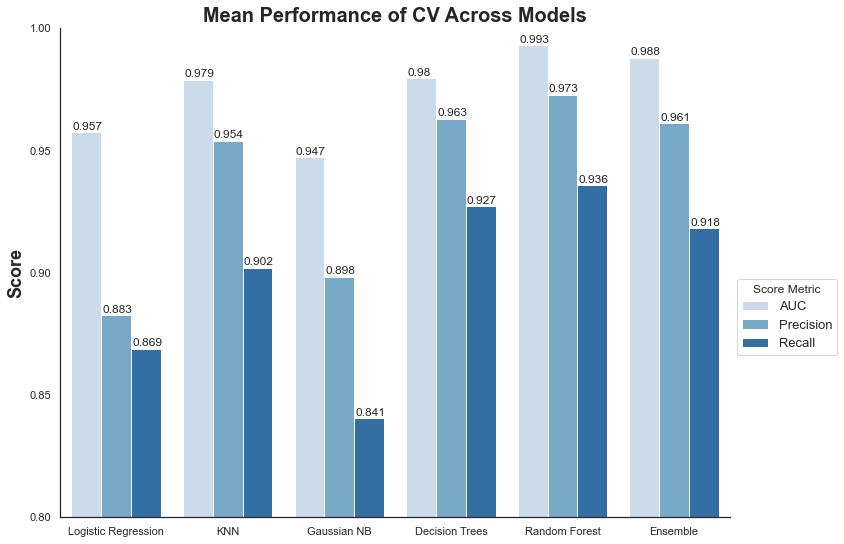

In [62]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[12,9])
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Blues')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.01, p.get_height()+0.001))
plt.legend(title='Score Metric',loc="upper right", bbox_to_anchor=(1.17, 0.5),fontsize=13)
plt.ylim([0.8,1.0])
plt.yticks([0.80,0.85,0.90,0.95,1.00])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
plt.title('Mean Performance of CV Across Models',weight='bold',fontsize=20)
sns.despine()

Model dengan performa terbaik (memiliki nilai AUC, precision, dan recall tertinggi) adalah model random forest

### Comparing Random Forest Model with Different Threshold

In [63]:
# spliting data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,random_state=42)

In [64]:
# membuat model random forest
rfc = RandomForestClassifier(max_depth=17, random_state=42)
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_train, y_train)

# menampilkan skor model random forest
print("Random Forest Model Score is :", "{:.2f}%".format(100* rfc_score))

Random Forest Model Score is : 98.64%


Threshold 0.5

In [65]:
# menghitung nilai y_predict dengan threshold 0.5
y_predict = rfc.predict_proba(X_val)[:, 1] >= 0.5

# menghitung nilai precision dan recall dari model random forest dengan threshold 0.5
precision_05 = precision_score(y_val, y_predict)
recall_05 = recall_score(y_val, y_predict)

print("Precision Score of Random Forest Model with 0.5 Threshold is : ", "{:.2f}%".format(100* precision_05))
print("Recall Score of Random Forest Model with 0.5 Threshold is : ", "{:.2f}%".format(100* recall_05))

Precision Score of Random Forest Model with 0.5 Threshold is :  97.45%
Recall Score of Random Forest Model with 0.5 Threshold is :  93.63%


Threshold 0.7

In [66]:
# menghitung nilai y_predict dengan threshold 0.7
y_predict = rfc.predict_proba(X_val)[:, 1] >= 0.7

# menghitung nilai precision dan recall dari model random forest dengan threshold 0.7
precision_07 = precision_score(y_val, y_predict)
recall_07 = recall_score(y_val, y_predict)

print("Precision Score of Random Forest Model with 0.7 Threshold is : ", "{:.2f}%".format(100* precision_07))
print("Recall Score of Random Forest Model with 0.7 Threshold is : ", "{:.2f}%".format(100* recall_07))

Precision Score of Random Forest Model with 0.7 Threshold is :  99.34%
Recall Score of Random Forest Model with 0.7 Threshold is :  90.37%


In [67]:
# menghitung nilai ROC-AUC dari model RF
roc_auc_score(y_val, rfc.predict_proba(X_val)[:, 1])

0.9927987107661415

Membandingkan model random forest dengan threshold 0.5 dengan 0.7

In [68]:
# menampilkan nilai perbandingan dalam bentuk dataframe
SV_model = [{'Scoring':'Precision','Threshold':0.5,'Score':precision_05},{'Scoring':'Precision','Threshold':0.7,'Score':precision_07},{'Scoring':'Recall','Threshold':0.5,'Score':recall_05},{'Scoring':'Recall','Threshold':0.7,'Score':recall_07}]
SV_model = pd.DataFrame(SV_model)
SV_model

,Scoring,Threshold,Score
0,Precision,0.5,0.974476
1,Precision,0.7,0.993353
2,Recall,0.5,0.936335
3,Recall,0.7,0.903746


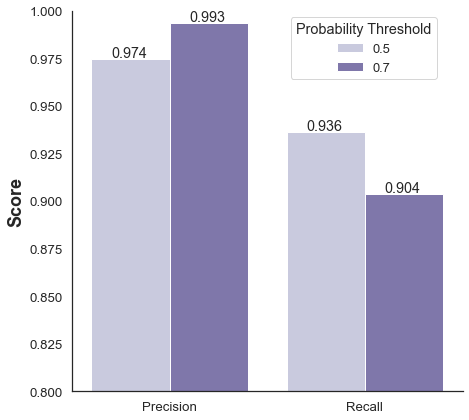

In [69]:
# menampilkan nilai perbandingan dalam bentuk visualisasi
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[7,7])
ax = sns.barplot(x='Scoring',y='Score',data=SV_model,hue='Threshold',palette='Purples')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.1, p.get_height()+0.001))
plt.legend(title='Probability Threshold',loc="upper right", bbox_to_anchor=(0.95, 1),fontsize=13)
plt.ylim([0.8,1.0])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
sns.despine()

# Model Evaluation

#### Model selected is Random Forest (depth=17) with threshold>=0.7. We evaluate the model on the test set:
- Plotting the confusion matrix, ROC curve
- Find out the precision, recall and AUC

#### The model is then tested on a business problem - How to ensure first-time customer satisfaction for economy/business:
- Random Forest Feature Importance is plotted to understand which feature scores to adjust
- Good Inflight Wifi service is crucial for customer satisfaction for both economy/business class customers
- Ease of online booking is important to business class customers

In [70]:
# model random forest
rf = RandomForestClassifier(max_depth=17,random_state=42)
rf.fit(X_train_val,y_train_val)
rf_score = rfc.score(X_train_val, y_train_val)

# menampilkan skor model random forest
print("Random Forest Model Score is :", "{:.2f}%".format(100* rf_score))

Random Forest Model Score is : 98.03%


In [71]:
def make_confusion_matrix(model, threshold=0.7):
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    satisfaction_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=120)
    ax = sns.heatmap(satisfaction_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
           yticklabels=['Neutral/Dissatisfied', 'Satisfied']);   
    plt.xlabel('Prediction',weight='bold',fontsize=12)
    plt.ylabel('Actual',weight='bold',fontsize=12)
    plt.title('Confusion Matrix',weight='bold',fontsize=15)

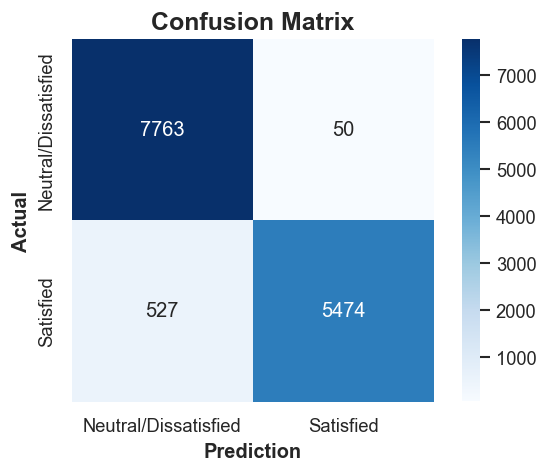

In [72]:
# membuat confusion matrix dari model random forest
sns.set(style='white',font_scale=1)
make_confusion_matrix(rf)

In [73]:
# menghitung nilai y_predict dari model rf terbaik
y_predict = rf.predict_proba(X_test)[:, 1]>=0.7

# menghitung nilai precision dan recall dari model rf terbaik
rf_precision = precision_score(y_test, y_predict)
rf_recall = recall_score(y_test, y_predict)
rf_f1score = f1_score(y_test, y_predict)
f1_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("Precision Score of The Best Model (Random Forest) is : ", "{:.2f}%".format(100* rf_precision))
print("Recall Score of The Best Model (Random Forest) is : ", "{:.2f}%".format(100* rf_recall))
print("F1-Score of The Best Model (Random Forest) is : ", "{:.2f}%".format(100* rf_f1score))
print("AUC Score of The Best Model (Random Forest) is : ", "{:.2f}%".format(100* f1_roc_auc))

Precision Score of The Best Model (Random Forest) is :  99.09%
Recall Score of The Best Model (Random Forest) is :  91.22%
F1-Score of The Best Model (Random Forest) is :  94.99%
AUC Score of The Best Model (Random Forest) is :  99.30%


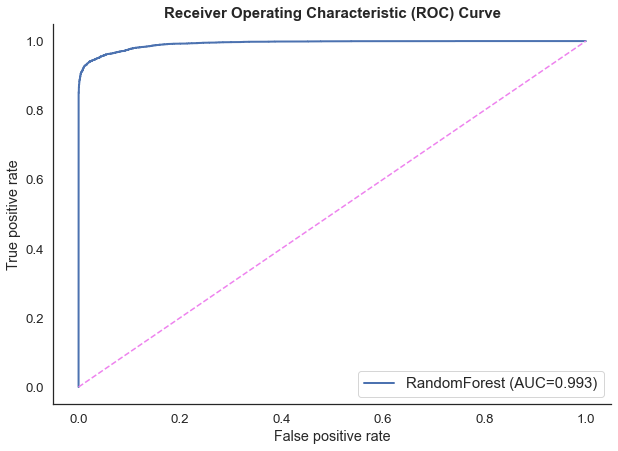

In [74]:
# membuat kurva roc 
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
plt.plot(fpr, tpr,lw=2,label='RandomForest (AUC={:.3f})'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc="lower right",fontsize=15)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',weight='bold',fontsize=15);
sns.despine()

In [75]:
# menghitung nilai feature importance dari setiap variabel dalam model rf
rf.feature_importances_

array([0.1518041 , 0.03599584, 0.01504751, 0.18137475, 0.06194535,
       0.07224375, 0.04035524, 0.05287537, 0.03006541, 0.02685608,
       0.02759237, 0.03127238, 0.04532151, 0.11691215, 0.1103382 ])

In [76]:
# menampilkan tabel peringkat/urutan feature importance dari setiap variabel dalam model rf
df_impt = pd.DataFrame({'features':X_train_val.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=True)
df_impt

,features,importance
2,Food And Drink,0.015048
9,Checkin Service,0.026856
10,Inflight Service,0.027592
8,Baggage Handling,0.030065
11,Cleanliness,0.031272
1,Ease Of Online Booking,0.035996
6,On-board Service,0.040355
12,Customer Type_Returning Customer,0.045322
7,Leg Room,0.052875
4,Seat Comfort,0.061945


Text(0.5, 1.0, 'Random Forest - Feature Importance')

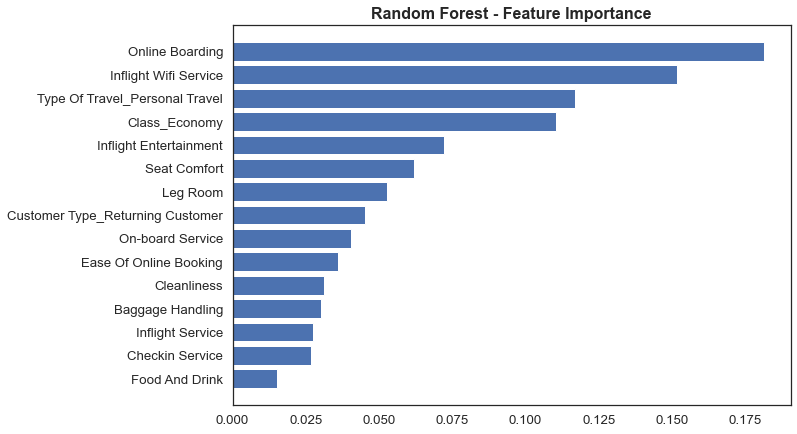

In [77]:
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
ax = plt.barh(df_impt['features'],df_impt['importance'])
plt.title('Random Forest - Feature Importance',weight='bold',fontsize=16)

Dari figur diatas, dapat ditarik kesimpulan bahwa dua fitur/variabel yang penting dalam model RF adalah "Online Boarding" dan "Inflight Wifi Service".

# Model Simulation

In [78]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(DF['id']))
Test_Set['Predicted Satisfaction'] = (rf.predict_proba(X_test)[:, 1]>=0.7).astype(int)
Test_Set = Test_Set[['Satisfaction','Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set['Satisfaction'] = Test_Set['Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
Test_Set['Predicted Satisfaction'] = Test_Set['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
Test_Set

,Satisfaction,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,Neutral/Dissatisfied,3,3,1,3,1,1,3,3,4,5,5,1,1,1,1
1,Satisfied,Satisfied,1,1,2,4,4,3,3,3,3,5,3,4,1,0,0
2,Satisfied,Satisfied,3,3,2,5,4,5,5,5,5,4,5,4,1,0,0
3,Satisfied,Satisfied,5,5,1,5,1,1,5,4,5,4,5,1,0,0,0
4,Neutral/Dissatisfied,Neutral/Dissatisfied,2,2,4,2,5,4,5,2,5,3,5,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13809,Neutral/Dissatisfied,Neutral/Dissatisfied,3,3,3,3,4,3,3,4,5,4,4,3,1,1,1
13810,Neutral/Dissatisfied,Neutral/Dissatisfied,3,3,4,5,4,5,5,3,5,4,5,5,1,1,1
13811,Neutral/Dissatisfied,Neutral/Dissatisfied,2,2,2,3,2,5,5,4,3,2,1,2,1,1,1
13812,Satisfied,Satisfied,3,3,2,4,5,5,5,4,5,5,5,4,1,0,0


In [79]:
Test_Set[(Test_Set['Class_Economy']==0)&(Test_Set['Satisfaction']=='Satisfied')&(Test_Set['Type Of Travel_Personal Travel']==0)&((Test_Set['Inflight Wifi Service']!=5))].head(100)

,Satisfaction,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
1,Satisfied,Satisfied,1,1,2,4,4,3,3,3,3,5,3,4,1,0,0
2,Satisfied,Satisfied,3,3,2,5,4,5,5,5,5,4,5,4,1,0,0
10,Satisfied,Satisfied,3,3,3,1,5,4,4,4,4,4,4,4,1,0,0
16,Satisfied,Satisfied,3,3,4,5,4,5,5,5,5,5,5,5,1,0,0
21,Satisfied,Satisfied,3,1,3,4,4,4,4,4,4,5,4,5,1,0,0
25,Satisfied,Satisfied,3,3,5,4,5,5,5,5,5,3,5,5,1,0,0
27,Satisfied,Satisfied,3,3,5,3,1,5,5,5,5,1,5,5,1,0,0
32,Satisfied,Satisfied,3,1,3,5,5,5,5,5,5,5,5,5,1,0,0
42,Satisfied,Satisfied,3,3,4,4,4,4,3,1,1,4,4,4,1,0,0
47,Satisfied,Satisfied,3,3,2,5,4,4,4,4,4,4,4,3,1,0,0


In [80]:
Test_Set_Economy = Test_Set[(Test_Set['Class_Economy']==1)&(Test_Set['Type Of Travel_Personal Travel']==1)&(Test_Set['Customer Type_Returning Customer']==0)]
Test_Set_Economy['Satisfaction'] = Test_Set_Economy['Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
Test_Set_Economy['Predicted Satisfaction'] = Test_Set_Economy['Predicted Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
precision_score(Test_Set_Economy['Satisfaction'], Test_Set_Economy['Predicted Satisfaction'])

1.0

In [81]:
## NEW ECONOMY (Personal Travel) CUSTOMERS ##
neweconomy = []
neweconomy.append({'Inflight Wifi Service':3,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1})     
neweconomy.append({'Inflight Wifi Service':5,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1})
neweconomy.append({'Inflight Wifi Service':4,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1})
neweconomy.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':1,'Class_Economy':1}) 
neweconomy = pd.DataFrame(neweconomy)

In [82]:
neweconomy['Predicted Satisfaction'] = (rf.predict_proba(neweconomy)[:, 1]>=0.7).astype(int)
neweconomy = neweconomy[['Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
neweconomy['Predicted Satisfaction'] = neweconomy['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
neweconomy

,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,3,3,3,3,3,3,3,3,3,3,3,3,0,1,1
1,Satisfied,5,3,3,3,3,3,3,3,3,3,3,3,0,1,1
2,Neutral/Dissatisfied,4,5,5,5,5,5,5,5,5,5,5,5,0,1,1
3,Neutral/Dissatisfied,3,5,5,5,5,5,5,5,5,5,5,5,0,1,1


In [83]:
Test_Set_Business = Test_Set[(Test_Set['Class_Economy']==0)&(Test_Set['Type Of Travel_Personal Travel']==0)&(Test_Set['Customer Type_Returning Customer']==0)]
Test_Set_Business['Satisfaction'] = Test_Set_Business['Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
Test_Set_Business['Predicted Satisfaction'] = Test_Set_Business['Predicted Satisfaction'].map({'Neutral/Dissatisfied':0,'Satisfied':1})
precision_score(Test_Set_Business['Satisfaction'], Test_Set_Business['Predicted Satisfaction'])

0.8871794871794871

In [84]:
## NEW Business (Business Travel) CUSTOMERS ##
newbusiness = []
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})     
newbusiness.append({'Inflight Wifi Service':5,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0})
newbusiness = pd.DataFrame(newbusiness)

In [85]:
newbusiness['Predicted Satisfaction'] = (rf.predict_proba(newbusiness)[:, 1]>=0.5).astype(int)
newbusiness = newbusiness[['Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
newbusiness['Predicted Satisfaction'] = newbusiness['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
newbusiness

,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0
1,Satisfied,5,3,3,3,3,3,3,3,3,3,3,3,0,0,0
2,Satisfied,3,5,5,5,5,5,5,5,5,5,5,5,0,0,0
3,Neutral/Dissatisfied,3,4,4,4,4,4,4,4,4,4,4,4,0,0,0
4,Satisfied,3,5,4,4,4,4,4,4,4,4,4,4,0,0,0
5,Neutral/Dissatisfied,3,4,5,5,5,5,5,5,5,5,5,5,0,0,0


# Conclusion

Dari perbandingan ke 5 algoritma diatas yakni algoritma KNN, Regresi Logistik, Gausian NB, Decision Tree, dan Random Forest. Hasil dari penelitian ini menunjukkan bahwa algoritma terbaik dalam membentuk model prediktif adalah algoritma Random Forest dengan threshold 0,7 yang menghasilkan presisi 99%, recall 91%, dan skor AUC 99%.

Penelitian ini mengusulkan agar maskapai penerbangan meningkatkan dan mengoptimalkan "In-Flight Wi-Fi Service". Saat maskapai penerbangan meningkatkan layanan akses wi-fi dalam penerbangan menjadi lebih mudah, atau menurunkan biaya akses wi-fi dalam penerbangan, maka akan ada lebih banyak penumpang kelas ekonomi maupun bisnis yang memanfaatkan layanan ini. Selain itu, maskapai penerbangan juga harus mengoptimalkan 'Ease of Online Booking' sehingga para pelanggan bisnis dapat lebih menikmati fleksibilitas dan kenyamanan saat terbang.